# Aula 08 - Exercício 07
## Árvores de decisão e Naive-Bayes
### Alunos:
-  Bruno Gomes Coelho - 9791160
-  Bruno Mendes da Costa - 9779433 

In [11]:
!wget https://raw.githubusercontent.com/BrunoxD/machineLearning/master/aula8/data.csv

--2019-04-25 14:28:52--  https://raw.githubusercontent.com/BrunoxD/machineLearning/master/aula8/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55561 (54K) [text/plain]
Saving to: ‘data.csv.2’

data.csv.2          100%[===================>]  54.26K  --.-KB/s    in 0.01s   

2019-04-25 14:28:52 (3.72 MB/s) - ‘data.csv.2’ saved [55561/55561]



In [12]:
!pip3 install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


---
O dataset *Statlog (German Credit Data) Data Set* é um dataset que visa classificar o risco de crédito de pessoas através de um conjunto de atributos. A classificação é feita em risco "Good" (bom - baixo risco) ou risco "Bad" (ruim - alto risco). Ao todo são 24 atributos numéricos e 1 atributo nominal, que representa a classe.

Esse dataset também apresenta o que chamamos de *matriz de custo*. Essa matriz é similar à matriz de confusão para o caso binário, porém, os elementos dessa matriz representam o custo associado com cada tipo de classificação. 

A matriz de custo desse dataset é dada abaixo:

|                  x | Good (Predito) | Bad (Predito) |
|-------------------:|------------:|-----------:|
| **Good (Real)** |           0 |          1 |
|  **Bad (Real)** |           5 |          0 |

A análsie dessa matriz pode ser feita da seguinte maneira: se uma classe real "Good" for predita como "Bad", existe um custo 1 associado. Todavia, se uma classe real "Bad" for predita como "Good", o custo associado é 5. Ou seja, um tipo de erro é melhor (menos custoso) do que o outro. 

O dataset pode ser carregado através do arquivo **data.csv**.


In [0]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


---
### Questão 01. 

Carregue o dataset e separe o conjunto em atributos e classe (X e y).

In [0]:
df = pd.read_csv("data.csv")

x = df.drop(columns="class")
y = df[["class"]]

---
### Questão 02.
Utilize 10-fold cross-validation estratificado para estimar a acurácia do classificador `sklearn.tree.DecisionTreeClassifier` com `criterion="entropy"`.

In [0]:
def print_results(results):
    print("Média das acurácias: ", results.mean(), "\tDesvio Padrão: ", results.std())

In [16]:
folds = StratifiedKFold(n_splits=10, random_state=42)
tree_results = cross_val_score(DecisionTreeClassifier(criterion="entropy"), x, y["class"], 
                               cv=folds)
    
print_results(tree_results)

Média das acurácias:  0.687 	Desvio Padrão:  0.032878564445547175


---
### Questão 03.
Agora utilize 10-fold cross-validation estratificado para estimar a acurácia do classificador `sklearn.naive_bayes.GaussianNB`

In [17]:
folds = StratifiedKFold(n_splits=10, random_state=42)
naive_results = cross_val_score(GaussianNB(), x, y["class"], cv=folds)
print_results(naive_results)

Média das acurácias:  0.73 	Desvio Padrão:  0.05422176684690384


---
### Questão 04.
Repita o procedimento da *Questão 02*, mas agora **calcule e imprima** a matriz de confusão do dataset, bem como a **acurácia calculada através da matriz de confusão** (o valor deve ser o mesmo do calculado anteriormente).

Para isso, inicialize uma matriz $2\times2$ com valores 0 e some, para cada fold, a matriz de confusão no conjunto de teste. Essa matriz irá funcionar basicamente como um acumulador e, ao final das 10 execuções, ela representará a matriz de confusão no conjunto como um todo.

In [0]:
# Fonte: https://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
def plot_confusion_matrix(cm):
    class_names = ['Bad', 'Good']
    sns.heatmap(cm, square=True, annot=True, fmt="d", cbar=False, xticklabels=class_names, yticklabels=class_names)
    plt.title('Matriz de Confusão')
    plt.ylabel('Classe Real')
    plt.xlabel('Classe Predita')
    """
    plt.clf()  
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
    

    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['VN','FP'], ['FN', 'VP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    """
    plt.show()

In [0]:
def calculate_matrix(model, name):
        
    matrix = np.zeros((2, 2))
    folds = StratifiedKFold(n_splits=10, random_state=42)
    for trn_idx, val_idx in folds.split(x, y):
        clf = model.fit(x.loc[trn_idx], y.loc[trn_idx]["class"])
        preds = clf.predict(x.loc[val_idx])
        matrix += confusion_matrix(y.loc[val_idx].values, preds)
    
    plot_confusion_matrix(matrix.astype(int))
    print("Acurácia para ", name)
    print((matrix[0][0] + matrix[1][1]) / matrix.sum())
    return matrix



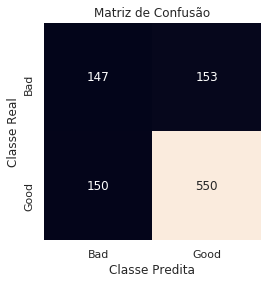

Acurácia para  Árvore de Decisão
0.697


In [20]:
tree_matrix = calculate_matrix(DecisionTreeClassifier(criterion="entropy"), 
                              "Árvore de Decisão")


Conforme podemos observar, temos o mesmo valor de acurácia pela matriz de confusão como pelo cálculo normal de acurácia.

---
### Questão 05.
Repita o procedimento da *Questão 04*, mas ao invés de usar o classificado `sklearn.tree.DecisionTreeClassifier`, utilize `sklearn.naive_bayes.GaussianNB`

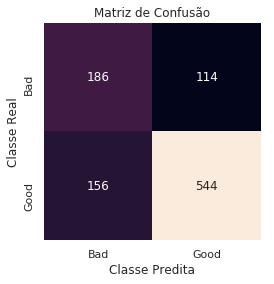

Acurácia para  Naive Bayes
0.73


In [21]:
naive_matrix = calculate_matrix(GaussianNB(), 
                              "Naive Bayes")


Novamente, conforme podemos observar, temos o mesmo valor de acurácia pela matriz de confusão como pelo cálculo normal de acurácia.

---

### Questão 06.
Calcule o custo associado a cada classificador e defina qual deles é o melhor. Para isso utilize as matrizes de confusão calculadas nas questões 04 e 05 e a matriz de custo especificada na descrição do dataset.

In [22]:
# Invertendo a matriz "original" de custo, dado que consideramos Bad/Good
cost = np.array([[0, 5], [1, 0]])
cost

array([[0, 5],
       [1, 0]])

In [23]:
print(cost*tree_matrix, "\n\n")
print("Custo total para árvore de decisão:", (cost*tree_matrix).sum())

[[  0. 765.]
 [150.   0.]] 


Custo total para árvore de decisão: 915.0


In [24]:
print(cost*naive_matrix, "\n\n")
print("Custo total para decisão bayesiana:", (cost*naive_matrix).sum())

[[  0. 570.]
 [156.   0.]] 


Custo total para decisão bayesiana: 726.0


---
### Questão 07.
Utilize o software Weka (https://www.cs.waikato.ac.nz/~ml/weka/) e realize classificação utilizando a árvore de decisão  J48. Reporte a acurácia do classificador sem pruning, com pruning=0.25 e pruning=0.1. 

Acurácia  
Sem Pruning = 70.4%  
Pruning 0.25 = 73.9%  
Pruning 0.10 = 72.5%  

---

